**Data Analysis for 3 different Black hole attacks**

1. Description of individual datasets
2. Correlation matrix to understand relationships between features and the target
3. t-SNE


In [5]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load data
data1 = pd.read_csv("/Users/souba636/Documents/vinnova_project_python/data-traces3-NOMS-2025/Blackhole/var15/base/base-15-1-dt-1724068673471/features_timeseries_60_sec.csv", sep=',')
data2 = pd.read_csv("/Users/souba636/Documents/vinnova_project_python/data-traces3-NOMS-2025/Blackhole/var15/dec/dec-15-1-dt-1724069704395/features_timeseries_60_sec.csv", sep=',')
data3 = pd.read_csv("/Users/souba636/Documents/vinnova_project_python/data-traces3-NOMS-2025/Blackhole/var15/oo/oo-15-1-dt-1724070727205/features_timeseries_60_sec.csv", sep=',')
data1 = data1.drop(['Unnamed: 0'],axis = 1)       # if there is a column for row numbers
data2 = data2.drop(['Unnamed: 0'],axis = 1)       # if there is a column for row numbers
data3 = data3.drop(['Unnamed: 0'],axis = 1)       # if there is a column for row numbers


In [4]:

# Assign task and class labels
all_data = pd.concat([data1, data2, data3])
label_mapping = {label: idx for idx, label in enumerate(sorted(all_data['label'].unique()))}
print(label_mapping)
data1['class_label'] = data1['label'].map(label_mapping)
data1['task_label'] = 1

data2['class_label'] = data2['label'].map(label_mapping)
data2['task_label'] = 1

data3['class_label'] = data3['label'].map(label_mapping)
data3['task_label'] = 1

data1 = data1.drop(columns="label", errors="ignore")
data2 = data2.drop(columns="label", errors="ignore")
data3 = data3.drop(columns="label", errors="ignore")


{0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3}


In [5]:
data1.describe()

,rank,disr,diss,dior,dios,diar,tots,rank.1,disr.1,diss.1,dior.1,dios.1,diar.1,tots.1,class_label,task_label
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.0
mean,336.468746,0.014400,0.001628,2.272672,0.996910,0.062178,1.098040,98.220506,0.024174,0.005701,3.002447,1.231371,0.168654,1.430076,0.501818,1.0
std,8.762241,0.074217,0.011439,4.188679,0.875774,0.192381,1.091338,6.451300,0.106551,0.039975,8.194820,2.155852,0.512799,2.721028,0.500452,0.0
min,298.666667,0.000000,0.000000,0.333333,0.333333,0.000000,0.333333,82.714390,0.000000,0.000000,0.487950,0.258199,0.000000,0.258199,0.000000,1.0
25%,330.666667,0.000000,0.000000,0.666667,0.666667,0.000000,0.666667,92.639599,0.000000,0.000000,0.836610,0.516398,0.000000,0.560612,0.000000,1.0
50%,340.178571,0.000000,0.000000,1.069048,0.800000,0.000000,0.833333,95.838753,0.000000,0.000000,1.146423,0.725010,0.000000,0.770329,1.000000,1.0
75%,341.466667,0.000000,0.000000,1.921474,1.000000,0.000000,1.083333,104.773844,0.000000,0.000000,1.680498,1.136182,0.000000,1.167748,1.000000,1.0
max,387.200000,0.692308,0.090909,33.538462,7.307692,1.750000,8.461538,125.626544,0.866025,0.301511,85.011719,21.663228,4.502525,23.971416,1.000000,1.0


In [6]:
data2.describe()

,rank,disr,diss,dior,dios,diar,tots,rank.1,disr.1,diss.1,dior.1,dios.1,diar.1,tots.1,class_label,task_label
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.0
mean,361.205366,0.208992,0.033715,3.698357,1.277865,2.476803,3.235362,100.591805,0.423886,0.064108,5.341935,1.915670,5.861102,5.947396,1.017921,2.0
std,54.506372,1.806616,0.621387,14.047666,3.492126,11.993185,10.269568,28.830769,3.034759,1.057613,28.984040,7.786185,29.986210,16.762066,1.000737,0.0
min,256.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,0.351866,0.000000,0.000000,0.000000,0.000000,2.0
25%,298.833333,0.000000,0.000000,0.600000,0.475000,0.000000,0.533333,66.098916,0.000000,0.000000,0.798809,0.516398,0.000000,0.516398,0.000000,2.0
50%,396.800000,0.000000,0.000000,1.366667,0.733333,0.200000,0.930952,119.140893,0.000000,0.000000,1.224745,0.686598,0.547567,0.754351,2.000000,2.0
75%,409.600000,0.166667,0.000000,3.000000,1.166667,1.857143,3.142857,120.463865,0.408248,0.000000,2.224949,1.363746,4.782966,5.980524,2.000000,2.0
max,462.533333,38.900000,14.600000,224.000000,51.857143,234.857143,209.100000,185.261486,55.038270,24.617970,453.623454,133.238419,613.473017,271.734531,2.000000,2.0


In [7]:
data3.describe()

,rank,disr,diss,dior,dios,diar,tots,rank.1,disr.1,diss.1,dior.1,dios.1,diar.1,tots.1,class_label,task_label
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.0
mean,522.399937,0.050870,0.000672,1.045266,0.686356,0.377521,0.811321,139.764969,0.169157,0.001799,1.279674,0.838190,0.785277,1.061728,0.913706,3.0
std,25.250438,0.102698,0.009549,2.462388,1.596407,3.686310,2.618155,24.724875,0.305731,0.025265,3.843111,3.051142,7.270096,5.265532,1.382429,0.0
min,456.111111,0.000000,0.000000,0.083333,0.083333,0.000000,0.133333,83.371385,0.000000,0.000000,0.288675,0.288675,0.000000,0.288675,0.000000,3.0
25%,501.375000,0.000000,0.000000,0.466667,0.400000,0.000000,0.428571,120.379335,0.000000,0.000000,0.650444,0.497245,0.000000,0.507093,0.000000,3.0
50%,537.666667,0.000000,0.000000,0.714286,0.545455,0.000000,0.583333,154.394146,0.000000,0.000000,0.871465,0.518875,0.000000,0.593617,0.000000,3.0
75%,539.702381,0.076923,0.000000,1.076923,0.692308,0.081731,0.750000,157.186248,0.277350,0.000000,1.129157,0.639940,0.285844,0.672789,3.000000,3.0
max,584.866667,1.076923,0.153846,45.538462,28.538462,64.769231,45.615385,193.922616,1.664101,0.375534,65.501419,43.811367,103.760264,74.251263,3.000000,3.0


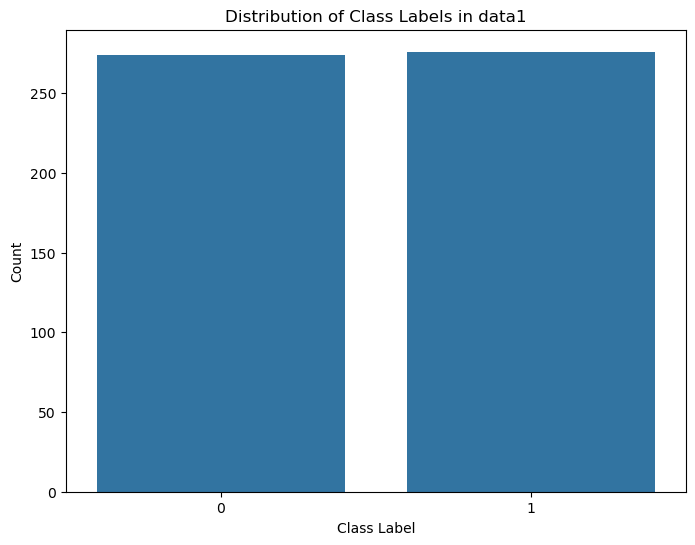

In [17]:
# Check the distribution of the target variable 'class_label'
class_label_counts1 = data1['class_label'].value_counts()

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.barplot(x=class_label_counts1.index, y=class_label_counts1.values)
plt.title("Distribution of Class Labels in data1")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

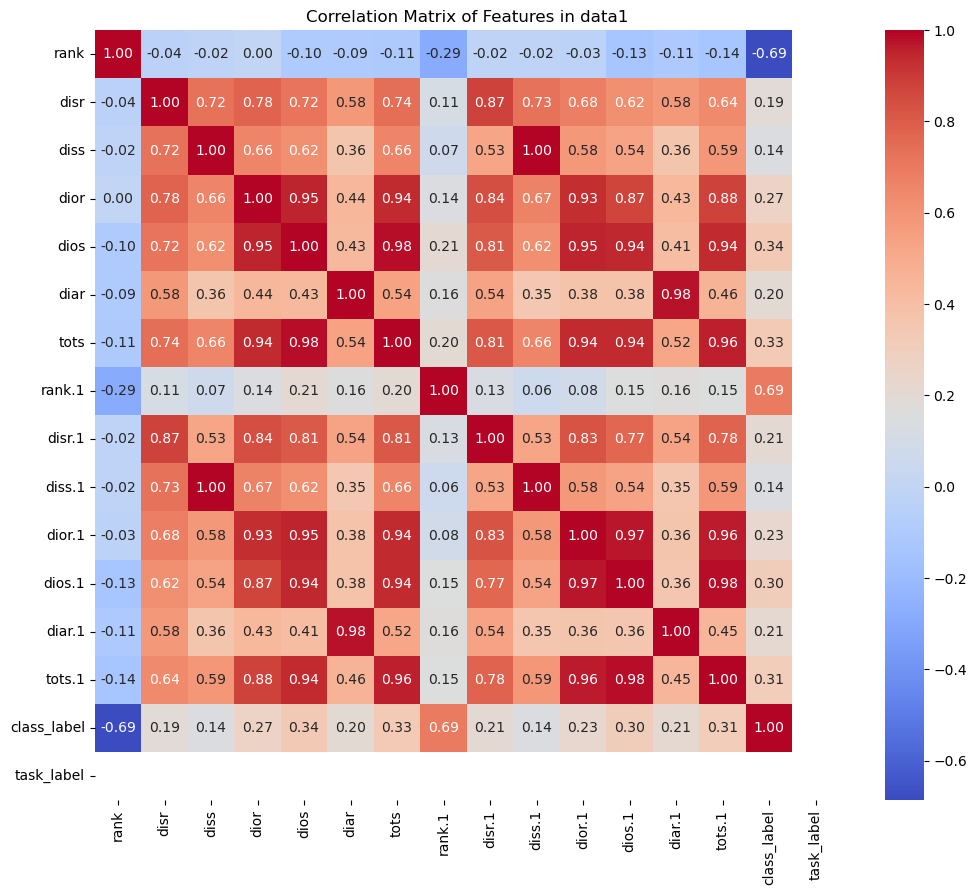

In [19]:
# Correlation matrix to understand relationships between features and the target
correlation_matrix = data1.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features in data1")
plt.show()

In [20]:
# Summary of the analysis
analysis_summary = {
    "class_label_counts": class_label_counts1.to_dict(),
    "top_positive_correlations": correlation_matrix['class_label'].sort_values(ascending=False).head(),
    "top_negative_correlations": correlation_matrix['class_label'].sort_values().head()
}

analysis_summary

{'class_label_counts': {1: 276, 0: 274},
 'top_positive_correlations': class_label    1.000000
 rank.1         0.690521
 dios           0.336558
 tots           0.331398
 tots.1         0.308164
 Name: class_label, dtype: float64,
 'top_negative_correlations': rank     -0.686810
 diss      0.141904
 diss.1    0.142228
 disr      0.186960
 diar      0.199260
 Name: class_label, dtype: float64}

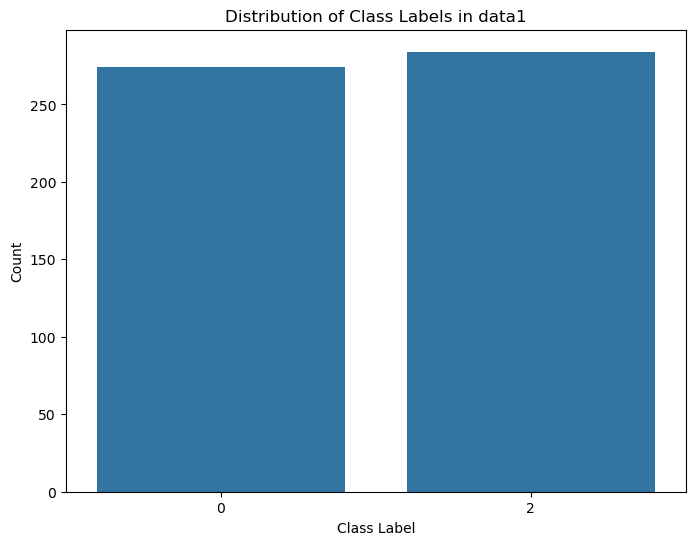

In [21]:
# Check the distribution of the target variable 'class_label'
class_label_counts2 = data2['class_label'].value_counts()

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.barplot(x=class_label_counts2.index, y=class_label_counts2.values)
plt.title("Distribution of Class Labels in data1")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

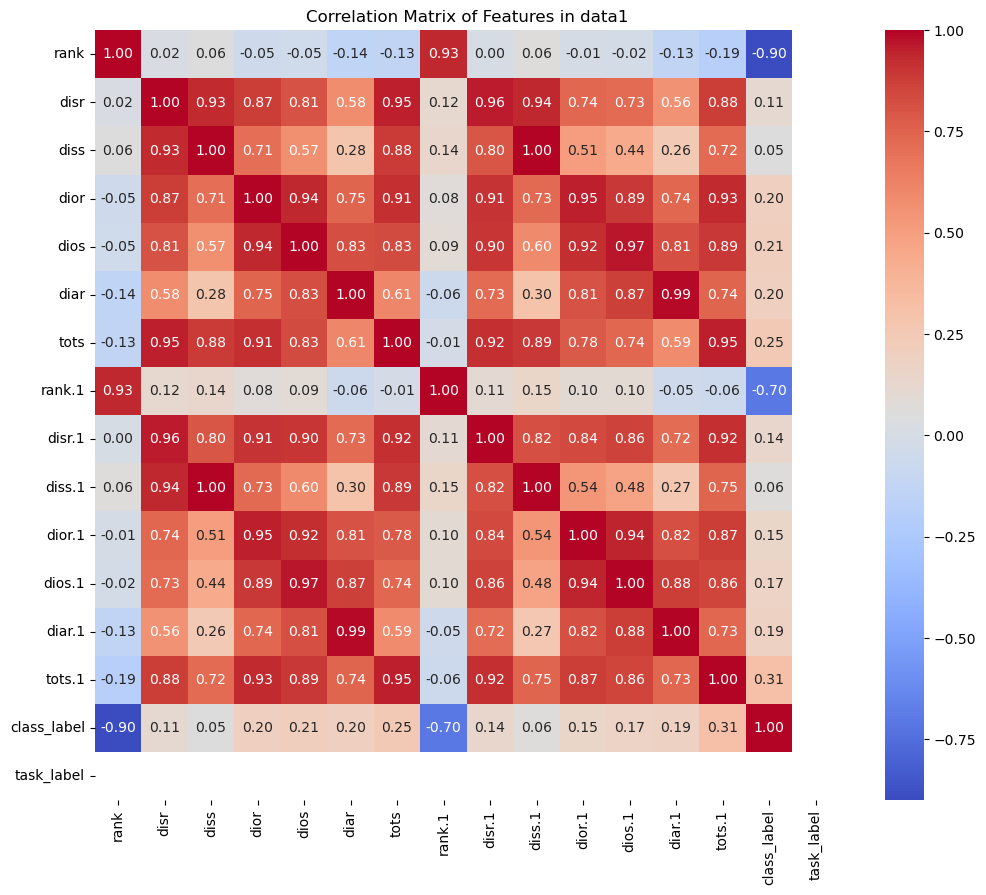

In [22]:
# Correlation matrix to understand relationships between features and the target
correlation_matrix = data2.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features in data1")
plt.show()

In [23]:
# Summary of the analysis
analysis_summary = {
    "class_label_counts": class_label_counts1.to_dict(),
    "top_positive_correlations": correlation_matrix['class_label'].sort_values(ascending=False).head(),
    "top_negative_correlations": correlation_matrix['class_label'].sort_values().head()
}

analysis_summary

{'class_label_counts': {1: 276, 0: 274},
 'top_positive_correlations': class_label    1.000000
 tots.1         0.314735
 tots           0.254364
 dios           0.206416
 dior           0.202000
 Name: class_label, dtype: float64,
 'top_negative_correlations': rank     -0.900037
 rank.1   -0.704478
 diss      0.053341
 diss.1    0.059592
 disr      0.113729
 Name: class_label, dtype: float64}

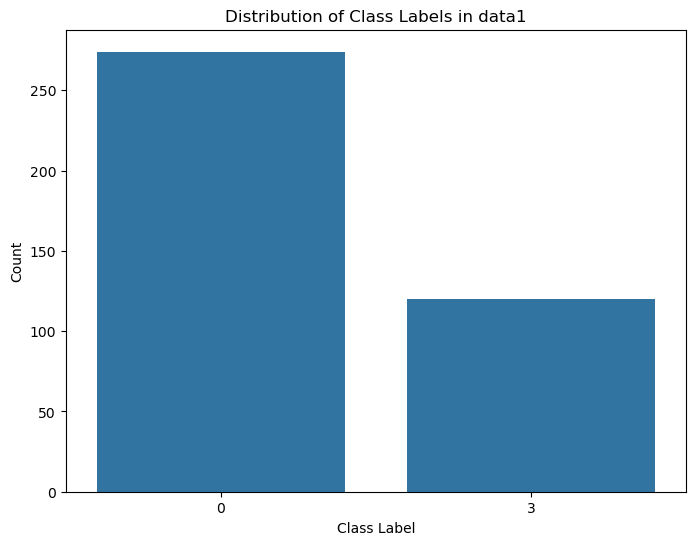

In [24]:
# Check the distribution of the target variable 'class_label'
class_label_counts3 = data3['class_label'].value_counts()

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.barplot(x=class_label_counts3.index, y=class_label_counts3.values)
plt.title("Distribution of Class Labels in data1")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

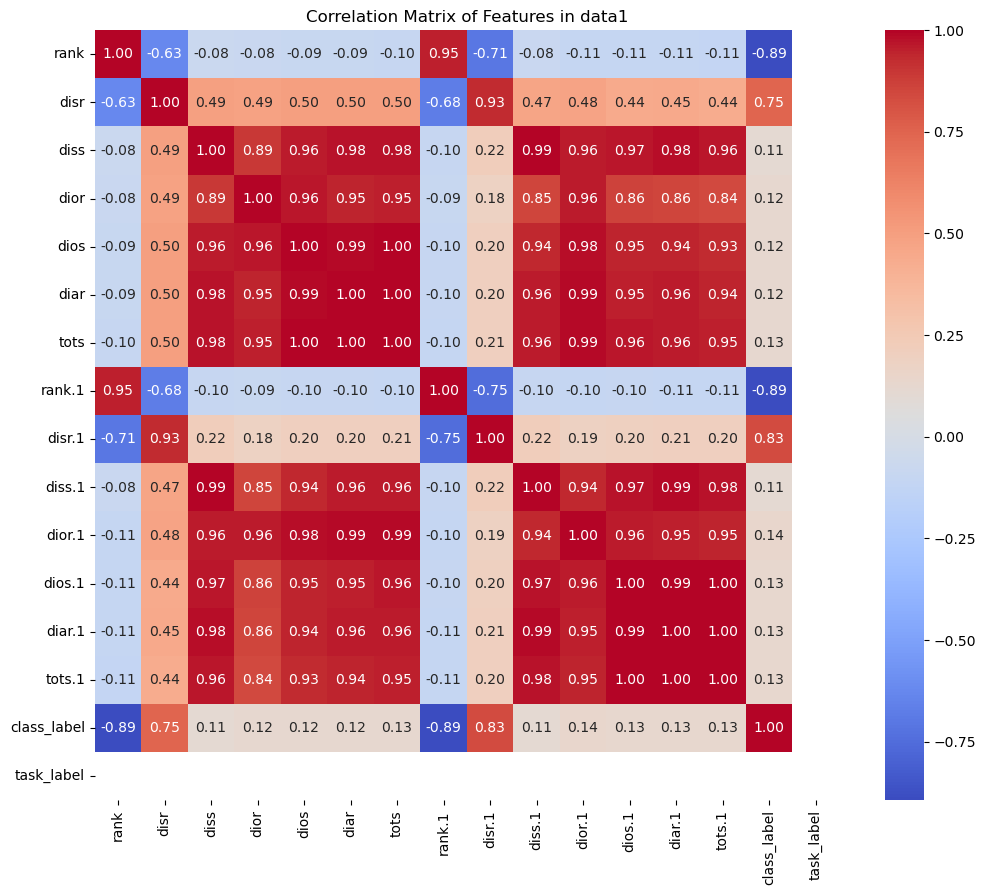

In [25]:
# Correlation matrix to understand relationships between features and the target
correlation_matrix = data3.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features in data1")
plt.show()

In [27]:
# Summary of the analysis
analysis_summary = {
    "class_label_counts": class_label_counts3.to_dict(),
    "top_positive_correlations": correlation_matrix['class_label'].sort_values(ascending=False).head(),
    "top_negative_correlations": correlation_matrix['class_label'].sort_values().head()
}

analysis_summary

{'class_label_counts': {0: 274, 3: 120},
 'top_positive_correlations': class_label    1.000000
 disr.1         0.832453
 disr           0.745845
 dior.1         0.136409
 tots.1         0.132827
 Name: class_label, dtype: float64,
 'top_negative_correlations': rank.1   -0.893874
 rank     -0.892440
 diss      0.106550
 diss.1    0.107742
 diar      0.122637
 Name: class_label, dtype: float64}

similarity statistics

In [28]:
# Summary statistics
stats_data1 = data1.describe()
stats_data2 = data2.describe()
stats_data3 = data3.describe()

# Check similarity in statistics
similarity_stats = {
    "data1_vs_data2": (stats_data1 - stats_data2).abs().mean(),
    "data1_vs_data3": (stats_data1 - stats_data3).abs().mean(),
}

similarity_stats

{'data1_vs_data2': rank           44.133606
 disr            6.037669
 diss            2.893891
 dior           26.423628
 dios            7.025636
 diar           32.172464
 tots           27.805561
 rank.1         30.079118
 disr.1          8.238552
 diss.1          4.174063
 dior.1         50.067137
 dios.1         15.801750
 diar.1         82.183360
 tots.1         34.931580
 class_label     1.502048
 task_label      1.750000
 dtype: float64,
 'data1_vs_data3': rank           159.995330
 disr            19.565811
 diss            19.508223
 dior            21.575376
 dios            22.417608
 diar            27.863779
 tots            24.498601
 rank.1          52.934830
 disr.1          19.677449
 diss.1          19.511579
 dior.1          22.849565
 dios.1          22.523577
 diar.1          32.864688
 tots.1          26.243546
 class_label     20.286733
 task_label      21.000000
 dtype: float64}

Distribution comparison

In [29]:
from scipy.stats import ks_2samp

# Compare distributions for each column
distribution_comparison = {}
for column in data1.columns:
    if column in data2.columns and column in data3.columns:
        ks_stat_data1_data2 = ks_2samp(data1[column], data2[column]).statistic
        ks_stat_data1_data3 = ks_2samp(data1[column], data3[column]).statistic
        distribution_comparison[column] = {
            "data1_vs_data2": ks_stat_data1_data2,
            "data1_vs_data3": ks_stat_data1_data3,
        }

distribution_comparison

{'rank': {'data1_vs_data2': 0.5428022157054415, 'data1_vs_data3': 1.0},
 'disr': {'data1_vs_data2': 0.2735940045617465,
  'data1_vs_data3': 0.21123211813567144},
 'diss': {'data1_vs_data2': 0.023297491039426525,
  'data1_vs_data3': 0.014923857868020305},
 'dior': {'data1_vs_data2': 0.1586314760508309,
  'data1_vs_data3': 0.25135209967697275},
 'dios': {'data1_vs_data2': 0.22871293580971,
  'data1_vs_data3': 0.45517305029995386},
 'diar': {'data1_vs_data2': 0.4333007494297817,
  'data1_vs_data3': 0.10986617443470235},
 'tots': {'data1_vs_data2': 0.3718475073313783,
  'data1_vs_data3': 0.4364559298569451},
 'rank.1': {'data1_vs_data2': 0.5374780058651026,
  'data1_vs_data3': 0.7585048454083987},
 'disr.1': {'data1_vs_data2': 0.2735940045617465,
  'data1_vs_data3': 0.22187355791416705},
 'diss.1': {'data1_vs_data2': 0.023297491039426525,
  'data1_vs_data3': 0.014923857868020305},
 'dior.1': {'data1_vs_data2': 0.1219028999674161,
  'data1_vs_data3': 0.2953945546838948},
 'dios.1': {'data1_

cosine similarity (for Feature Vectors)

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between datasets
cos_sim_data1_data2 = cosine_similarity(data1.mean(axis=0).values.reshape(1, -1), 
                                        data2.mean(axis=0).values.reshape(1, -1))[0][0]
cos_sim_data1_data3 = cosine_similarity(data1.mean(axis=0).values.reshape(1, -1), 
                                        data3.mean(axis=0).values.reshape(1, -1))[0][0]

cosine_similarity_results = {
    "data1_vs_data2": cos_sim_data1_data2,
    "data1_vs_data3": cos_sim_data1_data3,
}
cosine_similarity_results

{'data1_vs_data2': 0.9996753552330029, 'data1_vs_data3': 0.9997040005285562}

<Figure size 1200x800 with 0 Axes>

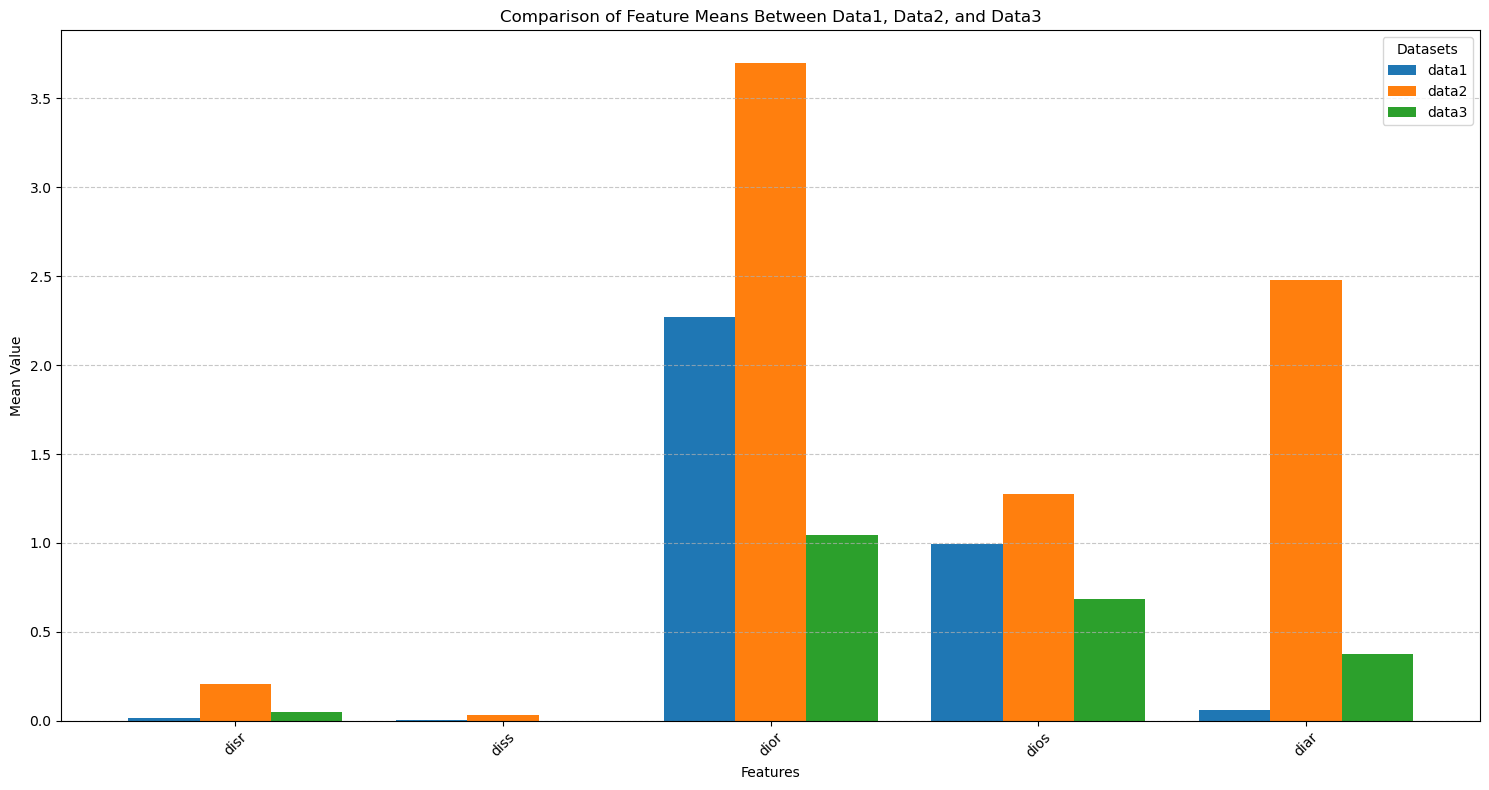

In [33]:
# Calculate the mean of features for each dataset
mean_data1 = data1.mean()[1:6]
mean_data2 = data2.mean()[1:6]
mean_data3 = data3.mean()[1:6]

# Combine mean values into a single DataFrame for comparison
mean_comparison = pd.DataFrame({
    "data1": mean_data1,
    "data2": mean_data2,
    "data3": mean_data3
})

# Plot mean feature values for each dataset
plt.figure(figsize=(12, 8))
mean_comparison.plot(kind='bar', figsize=(15, 8), width=0.8)
plt.title("Comparison of Feature Means Between Data1, Data2, and Data3")
plt.ylabel("Mean Value")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.legend(title="Datasets")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

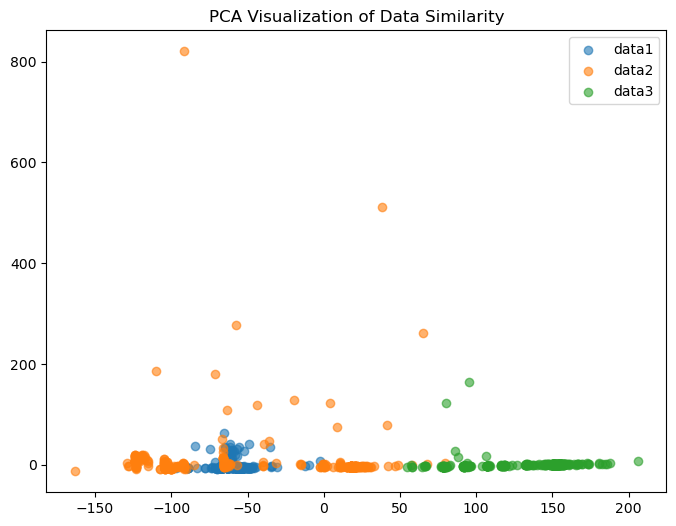

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Combine datasets and apply PCA
combined_data = pd.concat([data1.assign(dataset="data1"), 
                           data2.assign(dataset="data2"), 
                           data3.assign(dataset="data3")])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data.drop(columns=["dataset"]))

# Scatter plot
plt.figure(figsize=(8, 6))
for label in combined_data['dataset'].unique():
    subset = pca_result[combined_data['dataset'] == label]
    plt.scatter(subset[:, 0], subset[:, 1], label=label, alpha=0.6)
plt.title("PCA Visualization of Data Similarity")
plt.legend()
plt.show()


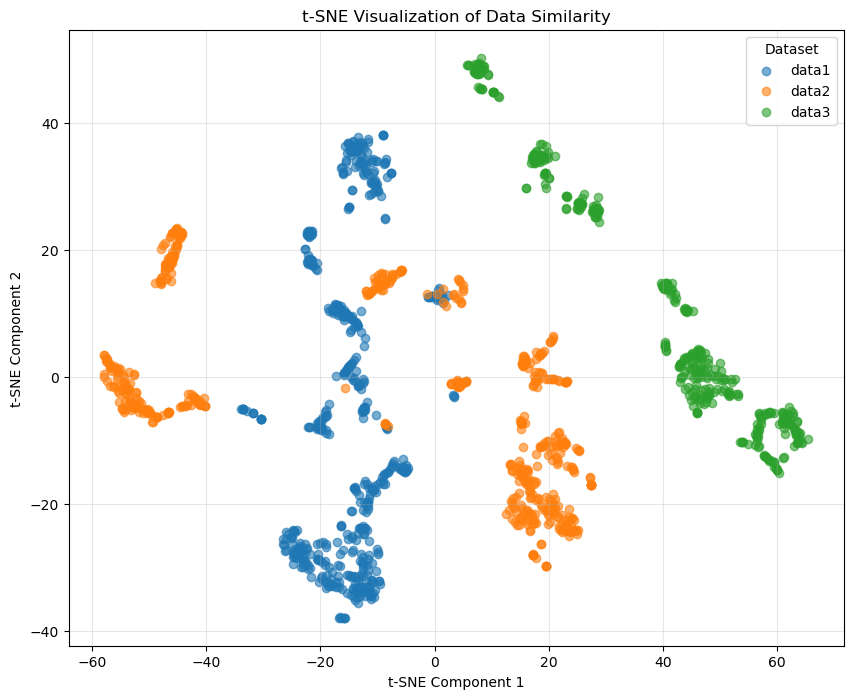

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Combine datasets and add labels for t-SNE visualization
combined_data = pd.concat([data1.assign(dataset="data1"), 
                           data2.assign(dataset="data2"), 
                           data3.assign(dataset="data3")])

# Extract features and labels
features = combined_data.drop(columns=["dataset"])
labels = combined_data["dataset"]

# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(features)

# Scatter plot of t-SNE results
plt.figure(figsize=(10, 8))
for label in labels.unique():
    subset = tsne_result[labels == label]
    plt.scatter(subset[:, 0], subset[:, 1], label=label, alpha=0.6)

plt.title("t-SNE Visualization of Data Similarity")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Dataset")
plt.grid(alpha=0.3)
plt.show()

**Insighta from t-SNE :**

**Distinct Features Across Datasets:**

1. The distinct clusters indicate that the datasets represent different data distributions, possibly corresponding to different tasks, conditions, or labels.
Potential for Classification:

2. The separable clusters imply that a machine learning model can likely classify data points from data1, data2, and data3 with high accuracy, as their features are distinct.
Possible Relationships Between Datasets:

3. If blue (data1) and orange (data2) clusters are closer, they might share similar underlying patterns or features, compared to green (data3), which is farther apart.
Dimensionality Relationships:

4. t-SNE does not preserve exact distances or scales but indicates similarity relationships. The clusters represent how datasets are grouped in a high-dimensional feature space, reduced to 2D.

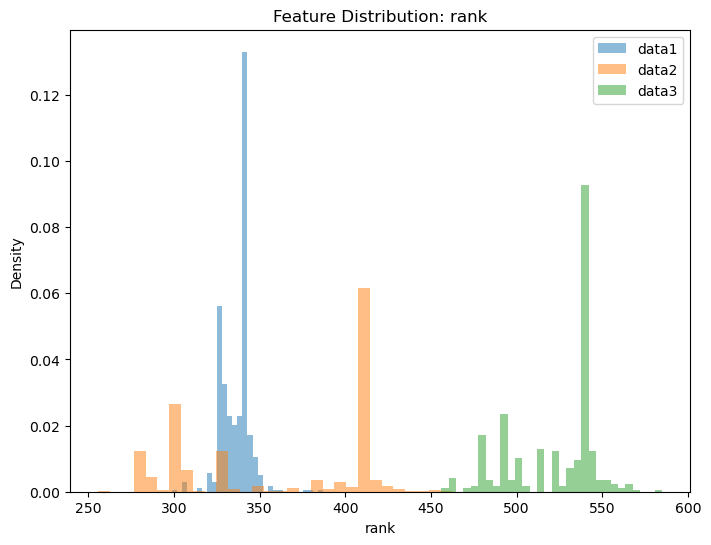

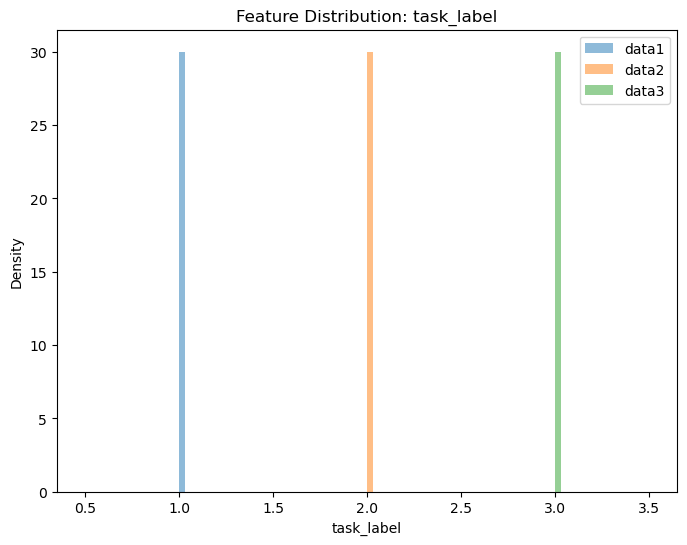

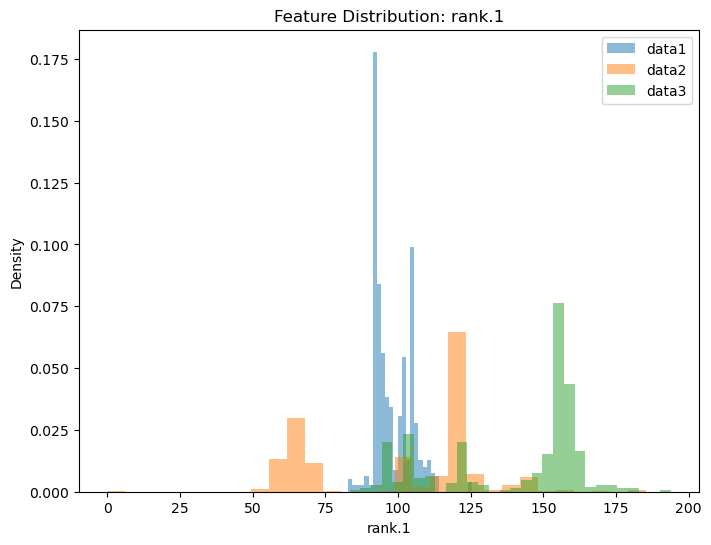

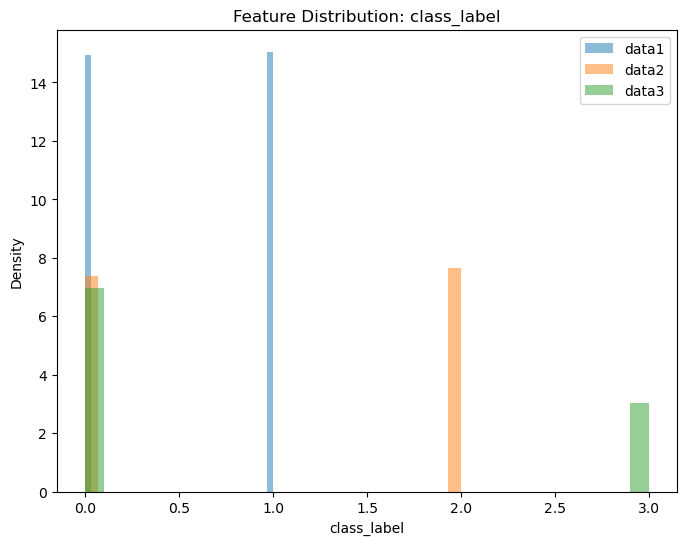

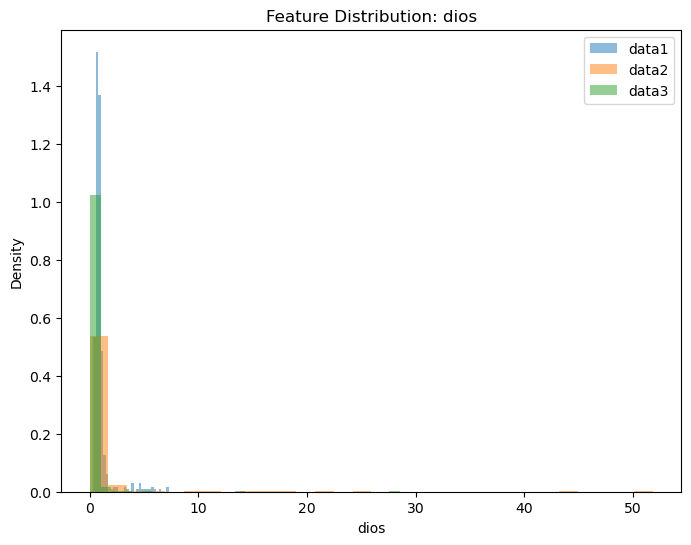

In [36]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Check feature distributions
feature_differences = {}

for feature in data1.columns:
    if feature in data2.columns and feature in data3.columns:
        ks_stat_12 = ks_2samp(data1[feature], data2[feature]).statistic
        ks_stat_13 = ks_2samp(data1[feature], data3[feature]).statistic
        ks_stat_23 = ks_2samp(data2[feature], data3[feature]).statistic
        feature_differences[feature] = {"data1_vs_data2": ks_stat_12, 
                                        "data1_vs_data3": ks_stat_13, 
                                        "data2_vs_data3": ks_stat_23}

# Plot distributions of top 5 most differing features
top_features = sorted(feature_differences, key=lambda x: max(feature_differences[x].values()), reverse=True)[:5]
for feature in top_features:
    plt.figure(figsize=(8, 6))
    plt.hist(data1[feature], bins=30, alpha=0.5, label="data1", density=True)
    plt.hist(data2[feature], bins=30, alpha=0.5, label="data2", density=True)
    plt.hist(data3[feature], bins=30, alpha=0.5, label="data3", density=True)
    plt.title(f"Feature Distribution: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

In [37]:
# Add labels to datasets
data1['dataset_label'] = 1
data2['dataset_label'] = 2
data3['dataset_label'] = 3

# Combine datasets
combined_data = pd.concat([data1, data2, data3], ignore_index=True)

# Compute correlations
correlations = combined_data.corr()['dataset_label'].sort_values(ascending=False)
print("Top positively correlated features:\n", correlations.head(5))
print("Top negatively correlated features:\n", correlations.tail(5))


Top positively correlated features:
 dataset_label    1.000000
task_label       1.000000
rank             0.819754
rank.1           0.545435
class_label      0.175639
Name: dataset_label, dtype: float64
Top negatively correlated features:
 tots     -0.000108
dios.1   -0.021489
dior.1   -0.028087
dior     -0.042135
dios     -0.042814
Name: dataset_label, dtype: float64
